In [108]:
import pandas as pd
import matplotlib
import sklearn
import numpy as np
%matplotlib inline 

##Multi-layer Perceptron

Use a Multilayer Perceptron (MLP) network to classify hand-written digits.

In [118]:
train = pd.read_csv('pendigits_train.csv')
test = pd.read_csv('pendigits_test.csv')
def split_x_y_array(df,ylabel):
    """Split data based on last column and change them into arrays"""
    y = np.asarray(df[ylabel])
    x = np.asarray(df.drop(ylabel,1))
    return x,y
train_x, train_y = split_x_y_array(train,'y')
test_x, test_y = split_x_y_array(test,'y')

In [119]:
import sknn
from sknn.mlp import Classifier, Layer
def Perceptron(classifier, no_unit, iterations):
    nn = classifier(
    layers=[
        Layer("Sigmoid", units=no_unit),
        Layer("Sigmoid")],
    learning_rate=0.01,
    n_iter=iterations)
    return nn
nn_list = []
unit_list = [10,20]
iter_list = [50, 100]
for i in unit_list:
    for j in iter_list:
        nn_list.append(Perceptron(Classifier, i, j)) 

In [122]:
nn_fit = []
for classifier in nn_list:
    nn_fit.append(classifier.fit(train_x, train_y))

In [158]:
#Analyze performance changes, f1 score and confusion matrix
f1scores = []
pred_list = []
for eachfit in nn_fit:
    predict = eachfit.predict(test_x)
    pred_list.append(predict)
for predict in pred_list:
    f1 = metrics.f1_score(test_y,predict, average = 'weighted')
    f1scores.append(f1)
print f1scores

[0.61623018256595086, 0.68636585184193921, 0.96919613177793884, 0.97976354854017189]


In [182]:
y_pred = []
for j in range(len(pred_list)):
    new = pd.Series(sum(pred_list[j].tolist(),[]))
    y_pred.append(new)
y_true = pd.Series(list(test_y))

In [186]:
#Confusion Matrix for unit = 10, n_iter = 50
pd.crosstab(y_true, y_pred[0], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,295,0,0,0,1,0,0,6,0,0,302
1,0,155,22,32,4,0,0,0,0,0,213
2,0,17,292,11,0,0,0,3,0,0,323
3,0,1,264,0,0,1,0,2,0,0,268
4,0,0,0,0,278,0,0,0,0,0,278
5,126,0,1,1,0,1,0,0,0,0,129
6,0,0,0,0,0,0,296,0,0,0,296
7,0,7,1,0,8,0,0,156,0,0,172
8,182,0,0,0,0,0,0,0,8,0,190


In [187]:
#Confusion Matrix for unit = 10, n_iter = 100
pd.crosstab(y_true, y_pred[1], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,4,5,6,7,8,9,All
True,,,,,,,,,,
0,299,0,0,2,0,0,1,0,0,302
1,0,202,10,0,0,0,1,0,0,213
2,0,7,315,0,0,0,1,0,0,323
3,0,1,266,0,0,0,1,0,0,268
4,0,1,0,271,0,0,4,0,2,278
5,126,0,3,0,0,0,0,0,0,129
6,0,0,0,0,0,296,0,0,0,296
7,0,12,5,1,0,0,154,0,0,172
8,103,0,0,0,0,0,0,87,0,190


In [188]:
#Confusion Matrix for unit = 20, n_iter = 50
pd.crosstab(y_true, y_pred[2], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,301,0,0,0,0,0,0,0,1,0,302
1,0,194,18,0,0,0,0,1,0,0,213
2,0,14,307,0,0,0,0,2,0,0,323
3,0,1,0,266,1,0,0,0,0,0,268
4,0,0,1,0,273,0,0,0,0,4,278
5,0,0,0,3,0,126,0,0,0,0,129
6,0,0,0,0,0,1,295,0,0,0,296
7,0,17,0,0,1,0,0,154,0,0,172
8,3,0,0,0,0,0,0,0,187,0,190


In [189]:
#Confusion Matrix for unit = 20, n_iter = 100
pd.crosstab(y_true, y_pred[3], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,301,0,0,0,0,0,0,0,1,0,302
1,0,197,15,0,1,0,0,0,0,0,213
2,0,3,320,0,0,0,0,0,0,0,323
3,0,1,0,267,0,0,0,0,0,0,268
4,0,0,0,0,276,0,0,0,0,2,278
5,0,0,0,2,0,127,0,0,0,0,129
6,0,0,0,0,0,0,296,0,0,0,296
7,0,13,0,0,1,0,0,158,0,0,172
8,0,0,0,0,0,5,0,0,185,0,190


In [196]:
units = [10,20,30,40,50,60,70,80,90,100]
pred_new = []
for i in units:
        pred_new.append(Perceptron(Classifier, i, 10).fit(train_x,train_y).predict(test_x))

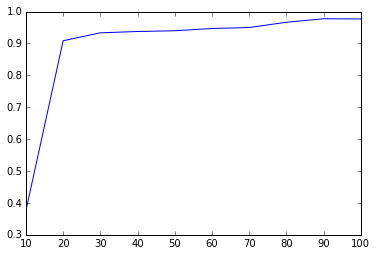

In [201]:
f1_new = []
for predict in pred_new:
    f1 = metrics.f1_score(test_y,predict, average = 'weighted')
    f1_new.append(f1)
import matplotlib.pyplot as plt
plt.plot(units, f1_new)
plt.show()

In [192]:
print metrics.classification_report(test_y, pred_list[0])
print metrics.classification_report(test_y, pred_list[1])
print metrics.classification_report(test_y, pred_list[2])
print metrics.classification_report(test_y, pred_list[3])

             precision    recall  f1-score   support

          0       0.49      0.98      0.65       302
          1       0.86      0.73      0.79       213
          2       0.50      0.90      0.65       323
          3       0.00      0.00      0.00       268
          4       0.96      1.00      0.98       278
          5       0.50      0.01      0.02       129
          6       1.00      1.00      1.00       296
          7       0.93      0.91      0.92       172
          8       1.00      0.04      0.08       190
          9       1.00      0.98      0.99        56

avg / total       0.69      0.69      0.62      2227

             precision    recall  f1-score   support

          0       0.57      0.99      0.72       302
          1       0.91      0.95      0.93       213
          2       0.53      0.98      0.68       323
          3       0.00      0.00      0.00       268
          4       0.99      0.97      0.98       278
          5       0.00      0.00      0.00

/Users/vivianchu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [193]:
nn_test = Classifier(
    layers=[
        Layer("Sigmoid", units=100),
        Layer("Sigmoid")],
    learning_rate=0.01,
    n_iter=50)
pred_test = nn_test.fit(train_x, train_y).predict(test_x)
print metrics.classification_report(test_y,pred_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       302
          1       0.93      0.94      0.94       213
          2       0.97      1.00      0.98       323
          3       0.99      1.00      0.99       268
          4       1.00      1.00      1.00       278
          5       1.00      0.98      0.99       129
          6       1.00      1.00      1.00       296
          7       1.00      0.92      0.96       172
          8       0.99      0.99      0.99       190
          9       1.00      0.98      0.99        56

avg / total       0.99      0.99      0.99      2227



In [194]:
nn_test = Classifier(
    layers=[
        Layer("Sigmoid", units=50),
        Layer("Sigmoid")],
    learning_rate=0.01,
    n_iter=50)
pred_test = nn_test.fit(train_x, train_y).predict(test_x)
print metrics.classification_report(test_y,pred_test)

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       302
          1       0.91      0.92      0.92       213
          2       0.96      0.99      0.97       323
          3       0.98      0.97      0.98       268
          4       1.00      1.00      1.00       278
          5       0.98      0.98      0.98       129
          6       1.00      0.99      0.99       296
          7       0.99      0.92      0.95       172
          8       0.97      1.00      0.99       190
          9       0.98      0.98      0.98        56

avg / total       0.98      0.98      0.98      2227



In [195]:
nn_test = Classifier(
    layers=[
        Layer("Sigmoid", units=60),
        Layer("Sigmoid")],
    learning_rate=0.01,
    n_iter=50)
pred_test = nn_test.fit(train_x, train_y).predict(test_x)
print metrics.classification_report(test_y,pred_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       302
          1       0.92      0.86      0.89       213
          2       0.92      0.99      0.95       323
          3       1.00      1.00      1.00       268
          4       1.00      1.00      1.00       278
          5       1.00      0.99      1.00       129
          6       1.00      1.00      1.00       296
          7       0.99      0.94      0.96       172
          8       0.99      1.00      0.99       190
          9       0.98      0.98      0.98        56

avg / total       0.98      0.98      0.98      2227



In [ ]:

# 10 hidden layers, and 50 epochs
nn_1050 = Classifier(
    layers=[
        Layer("Sigmoid", units=10),
        Layer("Sigmoid")],
    learning_rate=0.01,
    n_iter=50)

In [184]:
new = sum(pred_list[0].tolist(),[])
new_y = list(test_y)
new_series = pd.Series(new)
new_y_series = pd.Series(new_y)

In [185]:
print pd.crosstab(new_y_series, new_series, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0    1    2   3    4  5    6    7  8   9   All
True                                                       
0          295    0    0   0    1  0    0    6  0   0   302
1            0  155   22  32    4  0    0    0  0   0   213
2            0   17  292  11    0  0    0    3  0   0   323
3            0    1  264   0    0  1    0    2  0   0   268
4            0    0    0   0  278  0    0    0  0   0   278
5          126    0    1   1    0  1    0    0  0   0   129
6            0    0    0   0    0  0  296    0  0   0   296
7            0    7    1   0    8  0    0  156  0   0   172
8          182    0    0   0    0  0    0    0  8   0   190
9            1    0    0   0    0  0    0    0  0  55    56
All        604  180  580  44  291  2  296  167  8  55  2227


In [172]:
len(new)

2227